In [2]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import TensorBoard

logdir = './logs'

callbacks = [
    TensorBoard(log_dir=logdir, histogram_freq = 1,
                write_graph=True, write_images=True)
]


(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(777)

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'bag', 'ankle boot']

sample_size=9
random_idx = np.random.randint(60000, size=sample_size)

x_train = np.reshape(x_train / 255, (-1,28,28,1))
x_test = np.reshape(x_test / 255, (-1,28,28,1))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.3,
                                            random_state=777)

model  = Sequential(
    [
        Conv2D(filters=16, kernel_size=3, padding='same',
               activation='relu', input_shape=(28,28,1)),
        MaxPool2D(pool_size=(2,2), strides=2, padding='same'),
        
        Conv2D(filters=32, kernel_size=3, padding='same',
               activation='relu'),
        MaxPool2D(pool_size=(2,2), strides=2, padding='same'),
        
        Conv2D(filters=64, kernel_size=3, padding='same',
               activation='relu'),
        MaxPool2D(pool_size=(2,2), strides=2, padding='same'),
        
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ]
)


model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc']    
)

history = model.fit(
    x_tr, y_tr,
    epochs=30,
    batch_size =128,
    validation_data=(x_val, y_val),
    callbacks = callbacks
)

Epoch 1/30
329/329 [==============================] - 7s 19ms/step - loss: 0.6589 - acc: 0.7615 - val_loss: 0.5347 - val_acc: 0.7992
Epoch 2/30
329/329 [==============================] - 6s 19ms/step - loss: 0.3981 - acc: 0.8566 - val_loss: 0.3753 - val_acc: 0.8676
Epoch 3/30
329/329 [==============================] - 6s 20ms/step - loss: 0.3322 - acc: 0.8792 - val_loss: 0.3258 - val_acc: 0.8831
Epoch 4/30
329/329 [==============================] - 6s 19ms/step - loss: 0.3011 - acc: 0.8904 - val_loss: 0.2968 - val_acc: 0.8923
Epoch 5/30
329/329 [==============================] - 7s 20ms/step - loss: 0.2812 - acc: 0.8968 - val_loss: 0.3044 - val_acc: 0.8912
Epoch 6/30
329/329 [==============================] - 6s 19ms/step - loss: 0.2578 - acc: 0.9050 - val_loss: 0.2823 - val_acc: 0.8993
Epoch 7/30
329/329 [==============================] - 6s 19ms/step - loss: 0.2466 - acc: 0.9102 - val_loss: 0.2706 - val_acc: 0.9055
Epoch 8/30
329/329 [==============================] - 6s 19ms/step - 

In [7]:
!tensorboard --logdir=./logs


Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.13.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


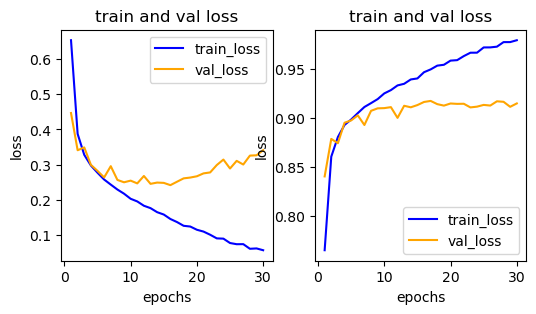

In [4]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (6, 3))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_loss')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_loss')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

In [5]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3708 - acc: 0.9102


[0.3707611560821533, 0.9101999998092651]

In [6]:
import numpy as np
np.set_printoptions(precision=7) # numpy 소수점 제한

results = model.predict(x_test)

print(results.shape)
print(f'각 클래스에 속할 확률 : \n{results[0]}')

313/313 [==============================] - 1s 4ms/step
(10000, 10)
각 클래스에 속할 확률 : 
[9.0579760e-10 1.9348538e-11 7.7094560e-11 3.7950593e-14 6.3160185e-12
 7.4954535e-08 3.1361490e-14 4.4771744e-04 9.7610132e-07 9.9955124e-01]


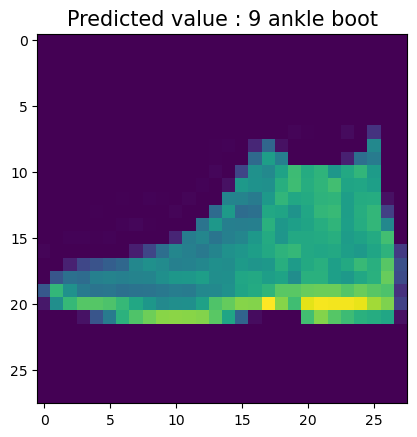

In [11]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1) # 가장 큰 값의 인덱스를 가져옵니다.
plt.imshow(x_test[0].reshape(28, 28))
plt.title('Predicted value : ' + str(arg_results[0])+' ' + str(class_names[arg_results[0]]), fontsize = 15)
plt.show()

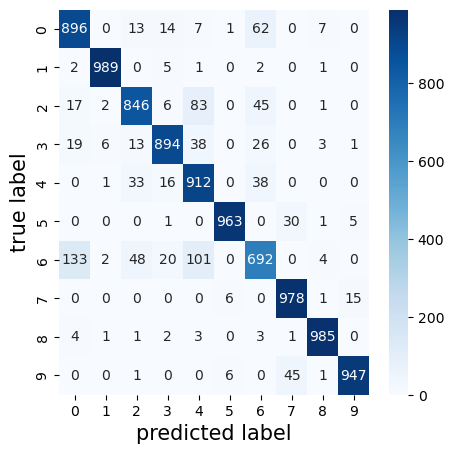

In [12]:
# sklearn.metrics 모듈은 여러가지 평가 지표에 관한 기능을 제공합니다.
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 혼동 행렬을 만듭니다.
plt.figure(figsize = (5,5 ))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('predicted label', fontsize = 15)
plt.ylabel('true label', fontsize = 15)
plt.show()

In [2]:
pip uninstall tensorflow-metal


Found existing installation: tensorflow-metal 0.8.0
Uninstalling tensorflow-metal-0.8.0:
  Would remove:
    /Users/macbook/anaconda3/lib/python3.10/site-packages/tensorflow-plugins/*
    /Users/macbook/anaconda3/lib/python3.10/site-packages/tensorflow_metal-0.8.0.dist-info/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.
